In [6]:
import getpass
import os
from langgraph.prebuilt import create_react_agent
import openai 

In [5]:
# check out a list of models
# models = openai.models.list()
# for m in models.data:
#     print(m.id)

In [7]:
# Helper Function
from langchain_core.messages import convert_to_messages


def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [5]:
# check for openai API
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")

In [8]:
# https://langchain-ai.github.io/langgraph/reference/agents/#langgraph.prebuilt.chat_agent_executor.create_react_agent
# Create a biologist agent
bio_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a biologist.\n\n"
        "INSTRUCTIONS:\n"
        "- You will be given two conflicts. Use your knowledge and examples in biology to propose a solution to solve the conflicts\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="bio_agent",
)

In [9]:
# Example to verify the bio_agent behavior
for chunk in bio_agent.stream(
    {"messages": [{"role": "user", "content": "How to achieve ease of operation while preventing external hamrs from affecting the objects?"}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: bio_agent

1. Ease of operation vs. preventing external harms:  
In biology, the cell membrane achieves both selective permeability and protection. The lipid bilayer is fluid and allows certain substances to pass through via protein channels (ease of operation) while blocking harmful substances (prevention of harm). Inspired by this, design interfaces that have "selective gateways"—mechanisms or protocols that enable smooth authorized actions but detect and block harmful intrusions. Examples could include multi-factor authentication for humans or biosensors for environment-sensitive machinery.

Supervisor: Solution provided through biological analogy—cell membrane's selective permeability model for optimized operation and protection.




In [10]:
# Create a physicst agent
phy_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a physicist.\n\n"
        "INSTRUCTIONS:\n"
        "- You will be given two conflicts. Use your knowledge and examples in physics to propose a solution to solve the conflicts\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="phy_agent",
)

In [11]:
# Example to verify the bio_agent behavior
for chunk in phy_agent.stream(
    {"messages": [{"role": "user", "content": "How to achieve ease of operation while preventing external hamrs from affecting the objects?"}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: phy_agent

One effective physics-based solution is to implement shielding with controlled access. Analogous to Faraday cages, you can enclose the objects within barriers that attenuate external electric, magnetic, or mechanical influences (depending on the harm source). Simultaneously, integrate precision-controlled interfaces—such as glove boxes, remote manipulators, or optical windows (like those used in vacuum chambers)—to allow operators to manipulate the objects with ease without ever exposing them directly to the external environment. This principle is widely seen in nuclear or biohazard labs, where containment and remote handling techniques ensure both operational efficiency and robust protection.




## New Architecture Testing

In [62]:
## Ask for User Input from perminal
user_input = input("Please enter your text: ")

### Step 1: Identify Target Domain from User Input

In [63]:
# 1st Agent: Identify Target Domain from User Input
target_domain_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "As a Domain Analysis Specialist, extract the core innovation domain from the user query. \n\n"
        "Instructions:\n"
        "1. Analyze the user's input\n"
        "2. Identify the primary domain requiring innovation\n"
        "3. Classify it within standard innovation categories\n\n"
        "Output Format:\n"
        "Target Domain: [Clear, specific domain label]\n"
        "Be very detailed and specific in your response and do not generalize. Respond ONLY with the name of the domain, do NOT include ANY other text like 'Target Domain:'."
    ),
    name="target_domain_agent",
)

In [77]:
# Check Target Domain Agent's Behaviour
for chunk in target_domain_agent.stream(
    {"messages": [{"role": "user", "content": user_input}]}
):
    pretty_print_messages(chunk)
    

Update from node agent:


================================== Ai Message ==================================
Name: target_domain_agent

Inclusive Digital Platforms for LGBTQ University Student Support and Community-Building in Higher Education




### Step 2: Conduct Thorough Research into Target Domain Identified

In [78]:
problem_landscape_input = input("Please enter your text: ")

In [74]:
# 2st Agent: Conduct comprehensive research into problem landscape for target domain 
# (i.e. What specific challenges exist in this domain?)
problem_landscape_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a Problem Landscape Analyst. Your task is to map out the concrete challenges within the target domain identified.\n\n"
        "Instructions:\n"
        "1. Identify 3-5 core problems or challenges currently present in this domain.\n"
        "2. For each problem, provide:\n"
        "- Problem: A short, clear title.\n"
        "- Description: 2-3 sentences explaining what the problem is and why it matters.\n"
        "- Context: Briefly state the circumstances or environment where this problem occurs.\n"
        "- Stakeholders: List the main groups or individuals affected.\n"
        "- Root Causes: Identify 1-3 underlying causes, if known.\n"
        "- Impact: State the significance of the problem (e.g., social, economic, technical).\n"
        "- Current Approaches: How is this problem currently addressed?\n"
        "- Limitations: What are the shortcomings of current approaches?\n"
        "- Success Metrics: How would you measure if this problem is solved?\n"
        "- Interconnections: Note if this problem is linked to or influenced by other problems.\n\n"
        "Output Format:\n"
        "Present your findings as a structured list or JSON array, with each problem fully described as above.\n"
        "Important:\n"
        "- Focus on clarity and completeness.\n"
        "- Avoid abstracting or generalizing; stay concrete and domain-specific.\n"
        "- Do not propose solutions; only describe the current problem landscape.\n"
    ),
    name="problem_landscape_agent",
)

In [79]:
 # Check Problem Landscape Agent's Behaviour
for chunk in problem_landscape_agent.stream(
    {"messages": [{"role": "user", "content": problem_landscape_input}]}
):
    pretty_print_messages(chunk)

   

Update from node agent:


================================== Ai Message ==================================
Name: problem_landscape_agent

[
  {
    "Problem": "Limited Accessibility and Usability for LGBTQ Students",
    "Description": "Many digital platforms intended for university support do not adequately address accessibility needs or the unique usability requirements of LGBTQ users, resulting in exclusion and discomfort. This can manifest as lack of inclusive language, poorly designed privacy controls, or features that fail to support diverse gender identities and sexual orientations.",
    "Context": "University-provided forums, mental health apps, and community platforms often overlook inclusive design when developing digital spaces to serve student populations.",
    "Stakeholders": ["LGBTQ students", "University IT staff", "Platform developers", "Student support services"],
    "Root Causes": [
      "Lack of LGBTQ representation in platform design/testing",
      "Insufficien

### Step 3: Abstract Problems Identified into Generalized Principles and TRIZ Contradiction

In [86]:
abstraction_agent_input = input("Please enter your text: ")

In [85]:
abstraction_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a TRIZ Methodology Expert. Transform domain-specific problems into universal contradictions.\n\n"
        "Process:\n"
        "1. For each problem provided by the problem_landscape_agent:\n"
        "- Abstract to universal parameters (what improves vs. what worsens)\n"
        "- Express as 'When we improve X, Y worsens'\n"
        "- Ensure parameters are domain-agnostic\n"
        "2. Identify 3-4 core contradictions:\n"
        "- Select the most fundamental tensions\n"
        "- Map to TRIZ contradiction matrix\n"
        " - Note applicable inventive principles\n\n"
        "Output\n:"
        "# Abstracted Parameters:\n"
        "- [Problem]: [Original] → [Universal Parameter 1], [Universal Parameter 2]...\n"
        "# Core Contradictions:\n"
        "1. Improving [parameter] vs. Worsening [parameter]\n"
        "- TRIZ Principles: [1-3 relevant principles]\n"
        "- Innovation Potential: [High/Medium/Low]\n"
        "- Universal Application: [Brief example from another domain]\n"
        "Focus on contradictions that, if resolved, would create breakthrough value.\n"
    ),
    name="abstraction_agent",
)

In [87]:
 # Check Problem Landscape Agent's Behaviour
for chunk in abstraction_agent.stream(
    {"messages": [{"role": "user", "content": abstraction_agent_input}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: abstraction_agent

:# Abstracted Parameters:
- [Limited Accessibility and Usability for LGBTQ Students]: Exclusion due to non-inclusive design, lack of privacy customization → Functional Universality (Degree of adaptation for diverse users), Safety/Comfort for User, Complexity of System Implementation, Information Confidentiality.
- [Online Harassment and Lack of Safe Spaces]: Safety compromised by insufficient moderation, slow/inconsistent resolution → User Safety, Process Speed/Responsiveness, System Transparency, Accountability/Control.
- [Insufficient University Resources and Institutional Commitment]: Limited support due to under-funding and low prioritization → Investment of Resources (Time/Effort/Funding), System Capability/Quality, Organizational Flexibility, Rate of Progress/Improvement.
- [Fragmented Community-Building and Support Networks]: Disconnection due to mu

### Step 4: Search for Appropriate Base Domains

In [88]:
base_domain_input = input("Please enter your text: ")

In [99]:
base_domain_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a Cross-Domain Search Specialist.\n"
        "For each contradiction provided, identify two distinct source domains (fields or industries) where this contradiction has been successfully addressed.\n"
        "The domains should have A CONCEPTUAL DISTANCE OF AT LEAST 2 DISTINCT HOPS FROM WHAT IMMEDIATELY COMES TO MIND. Be creative! It can be domains within spheres like natural, phsyical, social, artistic, anything.\n"
        "For each domain, briefly explain why it is relevant to the contradiction. Do not describe specific solutions-only list the domains and your rationale.\n"
        "Output:\n"
        "A list for each contradiction, naming two relevant domains with a one-sentence rationale for each.\n"
    ),
    name="base_domain_agent",
)

In [100]:
 # Check Base Domain Agent's Behaviour
for chunk in base_domain_agent.stream(
    {"messages": [{"role": "user", "content": base_domain_input}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: base_domain_agent

**Contradiction 1: Improving Functional Universality vs. Increasing System Complexity**

- **Gastronomy (Culinary Arts)**
  - High-end restaurants manage to serve diverse dietary needs (vegan, gluten-free, allergen-free) without overwhelming complexity for the kitchen or the diner, using creative menu engineering and modular prep methods.

- **Evolutionary Biology**
  - Organisms develop universal traits (e.g., adaptive immunity) that can handle a vast range of environmental threats without evolving ever-more complex body structures for each new challenge individually.

---

**Contradiction 2: Increasing User Safety/Control vs. Lowering System Responsiveness/Ease of Use**

- **Theater/Staged Performance**
  - Live theater employs backstage protocols and safety measures (e.g., trap doors, rigging, stunts) that protect actors and crew yet must allow for seam

### Step 5: Identify Solution in Base Domain

In [115]:
base_solution_input = input("Please enter text here:")

In [116]:
base_solution_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are a Solution Pattern Extractor. You are provided with an input with 2 base domains identified per contradiction.\n"
        "For each of these identified base domains , identify one specific, well-documented solution pattern within the domain that effectively resolves the contradiction.\n" 
        "For each solution pattern:\n"
        "- The original base domain identified\n"
        "- The name or label of the solution pattern\n"
        "- A detailed description of the core mechanism or principle involved and how it addressed the domain's contradiction\n"
        "- The context or situation in the domain where this pattern is applied\n"
        "Do not generalize or adapt the solution-simply describe how the contradiction is addressed within each source domain.\n\n"
        "Output:\n"
        "For each of the provided domain, list the base domain name, solution pattern name, a detailed description of its mechanism, and the context in which it is used.\n"
    ),
    name="base_solution_agent",
)

In [117]:
 # Check Base Solution Agent's Behaviour
for chunk in base_solution_agent.stream(
    {"messages": [{"role": "user", "content": base_solution_input}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: base_solution_agent

**Contradiction 1: Improving Functional Universality vs. Increasing System Complexity**

**Domain 1: Gastronomy (Culinary Arts)**
- **Solution Pattern Name:** Modular Menu Design
- **Mechanism:** Modular menu design decomposes dishes into base components (e.g., sauces, grain bases, proteins, toppings) that are prepped separately. Each finished dish is then assembled to order from these components, which are themselves chosen and prepared to meet multiple dietary restrictions. This approach lets a restaurant offer many combinations of dishes (universal coverage of dietary needs) using a relatively small and well-managed set of ingredients, reducing complexity for both kitchen workflow and menu navigation.
- **Context:** Frequently used in upscale restaurants and institutional catering to accommodate vegan, gluten-free, allergen-free, or other special diet

### Step 6: Base Domain Solution Informing Target Domain Solution

In [118]:
analogical_transfer_input = input("Please enter your text:")

In [119]:
analogical_transfer_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are an Analogical Transfer Specialist.\n"
        "Your task is to propose how solution patterns used to resolve abstracted contradictions in various base domains might inspire solution framings for the original target domain.\n\n"
        "Input:\n"
        "1. A list of abstracted contradictions, each with two base domains and their associated solution patterns (including how each contradiction was resolved in those domains).\n"
        "2. The original target domain.\n\n"
        "Instructions:\n"
        "For each contradiction, review the solution patterns from both base domains. For each pattern:\n"
        "- Analyze the core mechanism or principle behind the solution.\n"
        "- Map and adapt this mechanism conceptually to the target domain, considering the specific context and needs of the target domain.\n"
        "- Clearly describe how this analogical transfer could frame a potential solution in the target domain.\n"
        "- Highlight any key adaptations, considerations, or limitations that would be relevant when applying this pattern to the target domain.\n\n"
        "Output:\n"
        "For each contradiction and base domain solution pattern, provide a comprehensive description of a proposed solution framing for the target domain, including:\n"
        "- The original contradiction addressed\n"
        "- The source domain and solution pattern\n"
        "- A detailed explanation of how the pattern could inspire or inform a solution in the target domain\n"
        "- Any important adaptations or considerations for successful transfer\n"

    ),
    name="analogical_transfer_agent",
)

In [125]:
 # Check Base Solution Agent's Behaviour
for chunk in analogical_transfer_agent.stream(
    {"messages": [
        {"role": "user", "content": analogical_transfer_input},
        {"role": "user", "content": problem_landscape_input}
        ]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: analogical_transfer_agent

**Target Domain:** Inclusive Digital Platforms for LGBTQ University Student Support and Community-Building in Higher Education

---

### Contradiction 1: Improving Functional Universality vs. Increasing System Complexity

#### Source Domain: Gastronomy (Culinary Arts)  
**Solution Pattern:** Modular Menu Design

**Mechanism Analysis:**  
- Decompose a complex offering (menu) into modular, reusable components.
- Individual user needs (dietary restrictions) are met by assembling combinations of a manageable set of modules.
- Universal coverage (many options) achieved without a proportional increase in back-end complexity.

**Analogical Transfer to LGBTQ Digital Platforms:**  
- **Framing:** Structure digital community features and support resources as modular components rather than fixed, monolithic offerings.
- For example, instead of providing leng

## Bring Everything Together with Supervisor Agent

In [131]:
!pip install langgraph_supervisor

ERROR: Ignored the following versions that require a different python version: 0.0.1 Requires-Python >=3.11; 0.0.10 Requires-Python >=3.10; 0.0.11 Requires-Python >=3.10; 0.0.12 Requires-Python >=3.10; 0.0.13 Requires-Python >=3.10; 0.0.14 Requires-Python >=3.10; 0.0.15 Requires-Python >=3.10; 0.0.16 Requires-Python >=3.10; 0.0.17 Requires-Python >=3.10; 0.0.18 Requires-Python >=3.10; 0.0.19 Requires-Python >=3.10; 0.0.2 Requires-Python >=3.11; 0.0.20 Requires-Python >=3.10; 0.0.21 Requires-Python >=3.10; 0.0.3 Requires-Python >=3.11; 0.0.4 Requires-Python >=3.10; 0.0.6 Requires-Python >=3.10; 0.0.7 Requires-Python >=3.10; 0.0.8 Requires-Python >=3.10; 0.0.9 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement langgraph_supervisor (from versions: none)
ERROR: No matching distribution found for langgraph_supervisor


In [135]:
!pip install langgraph-supervisor hello


ERROR: Ignored the following versions that require a different python version: 0.0.1 Requires-Python >=3.11; 0.0.10 Requires-Python >=3.10; 0.0.11 Requires-Python >=3.10; 0.0.12 Requires-Python >=3.10; 0.0.13 Requires-Python >=3.10; 0.0.14 Requires-Python >=3.10; 0.0.15 Requires-Python >=3.10; 0.0.16 Requires-Python >=3.10; 0.0.17 Requires-Python >=3.10; 0.0.18 Requires-Python >=3.10; 0.0.19 Requires-Python >=3.10; 0.0.2 Requires-Python >=3.11; 0.0.20 Requires-Python >=3.10; 0.0.21 Requires-Python >=3.10; 0.0.3 Requires-Python >=3.11; 0.0.4 Requires-Python >=3.10; 0.0.6 Requires-Python >=3.10; 0.0.7 Requires-Python >=3.10; 0.0.8 Requires-Python >=3.10; 0.0.9 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement langgraph-supervisor (from versions: none)
ERROR: No matching distribution found for langgraph-supervisor


In [136]:
from langgraph_supervisor import create_supervisor
from langchain.chat_models import init_chat_model

supervisor = create_supervisor(
    model=init_chat_model("openai:gpt-4.1"),
    agents=[target_domain_agent, problem_landscape_agent, abstraction_agent, base_domain_agent, base_solution_agent, analogical_transfer_agent],
    prompt=(
        "You are a supervisor managing 6 agents and you will be given a problem to solve:\n"
        "Assign the problem first to the Target Domain Agent to identify the relevant domain.\n"
        "Then, pass the result to the Problem Landscape Agent to enumerate concrete challenges.\n"  
        "Next, instruct the Abstraction Agent to convert these challenges into universal contradictions.\n"  
        "Forward the contradictions to the Base Domain Agent to suggest relevant source domains for analogical reasoning.\n"  
        "Send the results to the Solution Pattern Agent to extract concrete solution patterns from those domains.\n"  
        "Finally, direct the Analogical Transfer Agent to adapt these patterns into actionable solution framings for the original target domain.\n"
        "At each step, ensure the output is passed as input to the next agent in the sequence.\n"
        "Do not skip or reorder steps.\n"
        "Do not execute any problem-solving yourself; your role is orchestration only.\n"
    ),
    add_handoff_back_messages=True,
    output_mode="full_history",
).compile()

# ## "- Target Domain Agent: Identifies the specific domain or field in which the user’s problem or innovation request is situated. Output: concise domain label.\n"
#         "- Problem Landscape Agent: Analyzes the target domain to enumerate and describe the main concrete challenges, issues, or pain points relevant to the user’s request. Output: structured list of domain-specific problems.\n"
#         "- Abstraction Agent: Takes the list of concrete problems and abstracts them into universal parameters and contradictions, removing domain-specific language to reveal underlying tensions. Output: list of abstracted contradictions.\n"
#         "- Base Domain Agent: For each abstracted contradiction, suggests two distinct source domains (fields or industries) where similar contradictions have been successfully addressed, with a brief rationale for each. Output: list of domains per contradiction.\n"
#         "- Base Solution Agent: For each contradiction and associated domain, identifies a specific, well-documented solution pattern from that domain, describing the mechanism and context in which it operates. Output: solution pattern name, mechanism description, and domain context.\n"
#         "- Analogical Transfer Agent: For each solution pattern, proposes how its core mechanism could be adapted to address the contradiction in the original target domain, providing a comprehensive description of the proposed solution framing and any necessary adaptations. Output: detailed proposed solution framing for the target domain.\n"

ModuleNotFoundError: No module named 'langgraph_supervisor'

## Old Code

In [113]:
# Create an analyst agent
analyst_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[],
    prompt=(
        "You are an analyst.\n\n"
        "INSTRUCTIONS:\n"
        "- You will be given a problem with two contradicting ideas\n"
        "- Your job is to identify the two contradictions in the problem and abstract them to general ideas\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="analyst_agent",
)

In [114]:
# Example to verify the analyst_agent behavior
for chunk in analyst_agent.stream(
    {"messages": [{"role": "user", "content": "To prevent water erosion of river banks, they can be strengthened with stones. However, water gradually washes sand and soil from under the stones, and the shoreline collapses. What can we do?"}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: analyst_agent

Contradictions:
1. The need to stabilize river banks with stones to prevent erosion vs. the fact that placing stones leads to gradual undercutting and collapse due to removal of soil and sand.
2. The aim to protect the shoreline using hard engineering structures vs. the unintended consequence that such structures can destabilize the very area they are meant to protect.

Abstractions:
1. Using a protective solution (reinforcement) that inadvertently undermines the stability of the system over time.
2. Implementing a direct intervention that creates secondary negative effects, negating the intended benefit.




In [127]:
from langgraph_supervisor import create_supervisor
from langchain.chat_models import init_chat_model

supervisor = create_supervisor(
    model=init_chat_model("openai:gpt-4.1"),
    agents=[analyst_agent, bio_agent, phy_agent],
    prompt=(
        "You are a supervisor managing three agents and you will be given a problem to solve:\n"
        "- an analyst agent. Assign the problem to this agent which will produce two contradictions\n"
        "- a bio agent. Assign the contradictions to this agent to find a solution from biologist point of view\n"
        "- a physics agent. Assign the contradictions to this agent to find a solution from physics point of view\n"
        "Assign the problem first to the analyst, but you can assign the returning contradictions to the bio agent and physics agent at the same time\n"
        "Summarize the solutions from the bio agent and physics agent"
    ),
    add_handoff_back_messages=True,
    output_mode="full_history",
).compile()


ImportError: cannot import name 'langgraph_supervisor' from 'langgraph' (unknown location)

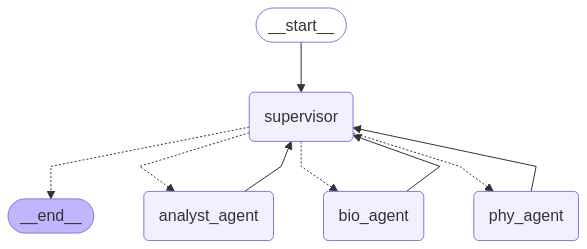

In [19]:
from IPython.display import display, Image

display(Image(supervisor.get_graph().draw_mermaid_png()))

In [38]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "To prevent water erosion of river banks, they can be strengthened with stones. However, water gradually washes sand and soil from under the stones, and the shoreline collapses. What can we do?",
            }
        ]
    },
):
    pretty_print_messages(chunk)

final_message_history = chunk["supervisor"]["messages"]

Update from node supervisor:


================================ Human Message =================================

To prevent water erosion of river banks, they can be strengthened with stones. However, water gradually washes sand and soil from under the stones, and the shoreline collapses. What can we do?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_analyst_agent (call_kpniD5DpaDnhIsdiByxiUcrl)
 Call ID: call_kpniD5DpaDnhIsdiByxiUcrl
  Args:
================================= Tool Message =================================
Name: transfer_to_analyst_agent

Successfully transferred to analyst_agent


Update from node analyst_agent:


================================ Human Message =================================

To prevent water erosion of river banks, they can be strengthened with stones. However, water gradually washes sand and soil from under the stones, and the shoreline collapses. What can we do?
=========